In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
set1=pd.read_excel('set1.xlsx')

In [4]:
set1

,Name of company,Measure X
0,Allied Signal,0.2423
1,Bankers Trust,0.2553
2,General Mills,0.2541
3,ITT Industries,0.2414
4,J.P.Morgan & Co.,0.2962
5,Lehman Brothers,0.2825
6,Marriott,0.2581
7,MCI,0.2439
8,Merrill Lynch,0.4026
9,Microsoft,0.3295


In [5]:
set1.describe()

,Measure X
count,15.000000
mean,0.332713
std,0.169454
min,0.241400
25%,0.254700
50%,0.267100
75%,0.339750
max,0.913600


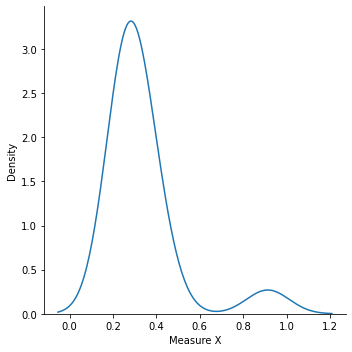

In [14]:
sns.displot(set1['Measure X'],kind='kde');

<AxesSubplot:>

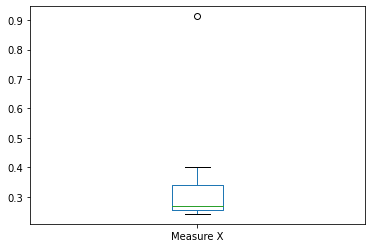

In [15]:
set1.plot(kind='box')

In [23]:
def outlier_iqr(x):
    percentile25=x.quantile(0.25)
    percentile75=x.quantile(0.75)
    iqr=percentile75-percentile25
    lower_boundry=percentile25-(1.5*iqr)
    upper_boundry=percentile75+(1.5*iqr)
    return(upper_boundry,lower_boundry)

In [25]:
upper,lower=outlier_iqr(set1['Measure X'])

In [27]:
upper,lower

(0.46732499999999993, 0.1271250000000001)

## Finding Outliers


### Trimming

In [28]:
x=set1['Measure X']

In [31]:
set1[(x>upper)| (x<lower)]

,Name of company,Measure X
10,Morgan Stanley,0.9136


In [33]:
new_set1=set1[x<upper]
new_set1.reset_index(drop=True,inplace=True)

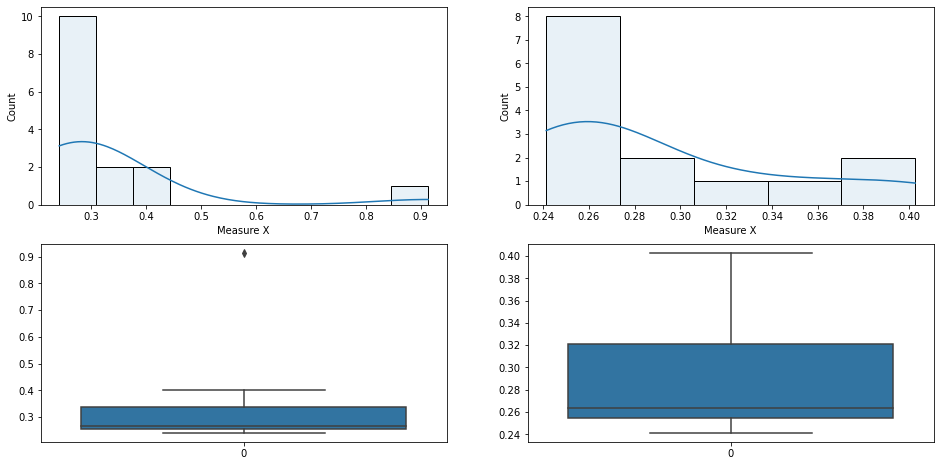

In [66]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(set1['Measure X'],kde=True,alpha=0.1)


plt.subplot(2,2,2)
sns.histplot(new_set1['Measure X'],kde=True,alpha=0.1)

plt.subplot(2,2,3)
sns.boxplot(set1['Measure X'])

plt.subplot(2,2,4)
sns.boxplot(new_set1['Measure X']);


## Capping Or Winsorization

In [79]:
set1_cap=set1.copy()

In [80]:
set1_cap['Measure X']=np.where(set1['Measure X']>=upper,upper,np.where(set1['Measure X']<=lower,lower,set1['Measure X']))

<AxesSubplot:ylabel='Count'>

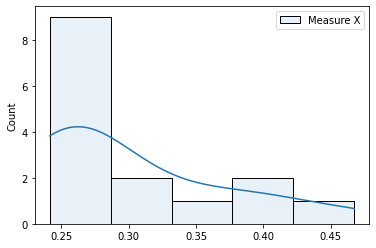

In [86]:
sns.histplot(set1_cap,kde=True,alpha=0.1)